# It's easy to collect data with python. 

With python you can load data from almost all kind of sources.
- disk
- databases
- http rrequests (http get, REST APIs..)

## Let's Collect data from pubmed thanks to an external module

In [1]:
from pymed import PubMed

(Beware not to over sollicitate Pubmed central API)

In [9]:
max_results = 50 # number of results retrived
email = "myemail3@yahoo.fr"
request_purpose = "Python_exploration"

In [17]:
# Create a PubMed object that GraphQL can use to query
# Note that the parameters are not required but kindly requested by PubMed Central
# https://www.ncbi.nlm.nih.gov/pmc/tools/developers/
pubmed = PubMed(tool=request_purpose, email=email)

In [18]:
# Create a GraphQL query in plain text
query = "autism[Title]"

In [19]:
# Execute the query against the API
results = list(pubmed.query(query, max_results=max_results))

In [20]:
# print type of the object retreived by pubmed
type(results)

list

In [21]:
# Loop over the retrieved articles
for article in list(results):

    # Print the type of object we've found (can be either PubMedBookArticle or PubMedArticle)
    print(type(article))

    # Print a JSON representation of the object
    print(article.toJSON())

<class 'pymed.article.PubMedArticle'>
{
    "abstract": "Autism Spectrum Disorder (ASD) is associated with atypical activation in the ventral stream during face processing. The current study further characterizes the development of face processing in ASD using a multivoxel pattern analysis, which assesses the similarity in the representation of exemplars from the same category.\nNinety-two children, adolescents and adults - with and without ASD - performed the Cambridge Face Memory Test, the Australian Face Memory Test, and a matched car memory test. Regions of interest during these tasks included Fusiform Face Area (FFA), based on the literature, and additional, structurally-defined regions in the ventral stream. Group differences in the patterns of activity within these ROIs when memorizing exemplars were examined using a representational similarity analysis (RSA).\nThe RSA revealed significant interactions between age group and diagnostic group in R FFA, with increasing similarity w

## Then extract only what we want

In [22]:
import json

In [23]:
# Loop over the retrieved articles and store the data in a list 
article_list = []

for article in results:
    if str(type(article)) == str("<class 'pymed.article.PubMedArticle'>"):
        json_article = json.loads(article.toJSON())
        abstract = json_article['abstract']
        journal = json_article['journal']
        title = json_article['title']
        publication_date = json_article['publication_date']
        
        article_list.append({'title': title,'journal':journal,'abstract':abstract,'publication_date':publication_date})
              

In [24]:
type(article_list),len(article_list)

(list, 50)

In [26]:
# Let's use the famous pandas library to check our data and export it
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# convert our article list into a pandas dataframe
article_dataframe = pd.DataFrame(article_list)

In [28]:
article_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
title               50 non-null object
journal             50 non-null object
abstract            48 non-null object
publication_date    50 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [29]:
# let's view the first rows
article_dataframe.head(10)

title  \
0  Representational similarity analysis reveals a...   
1  Children with autism spectrum disorder comorbi...   
2  Microbiota and gut-brain axis dysfunction in a...   
3  How Attention to Faces and Objects Changes Ove...   
4  Cross-modal emotion recognition and autism-lik...   
5  The effect of motor and physical activity inte...   
6  The feasibility of low-intensity psychological...   
7  Correction to: Early Detection, Diagnosis and ...   
8  A Randomized Controlled Trial of Sertraline in...   
9  Executive Function in Autism Spectrum Disorder...   

                                             journal  \
0                                         NeuroImage   
1                                Brain & development   
2                        Asian journal of psychiatry   
3                                     Brain sciences   
4           Journal of experimental child psychology   
5  Autism : the international journal of research...   
6  Autism : the international journal of research...   
7      Journal of autism and developmental disorders   
8                            Frontiers in psychiatry   
9                            Frontiers in psychiatry   

                                            abstract publication_date  
0  Autism Spectrum Disorder (ASD) is associated w...       2019-12-02  
1  The DSM-5 confirmed that autism spectrum disor...       2019-12-02  
2  The high frequency of functional gastrointesti...       2019-12-01  
3  Further understanding of the longitudinal chan...       2019-12-01  
4  The ability to explicitly recognize emotions d...       2019-11-30  
5  Difficulty performing age-appropriate motor sk...       2019-11-30  
6  Low-intensity cognitive behaviour therapy incl...       2019-11-30  
7  The original version of this article unfortuna...       2019-11-30  
8                                                          2019-11-30  
9  This review presents an outline of executive f...       2019-11-30

In [30]:
# we can sort the rows by date
article_dataframe.sort_values(by="publication_date", ascending=True,inplace=True)

# Display a wordcloud with the title data

In [79]:
from wordcloud import WordCloud,STOPWORDS

In [63]:
# put all the title data into one string
titles_text = list(article_dataframe.title)
title_text_merged = ''.join(titles_text)

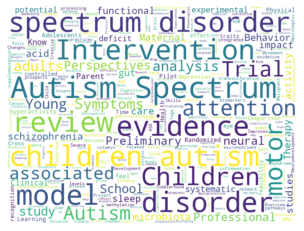

In [80]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white", max_words=2000,width=800, height=600,
               stopwords=stopwords, contour_width=3, contour_color='steelblue', relative_scaling=0).generate(title_text_merged)

# Display the generated image:

# the matplotlib way:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(8, 8)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# The pil way (if you don't have matplotlib)
image = wordcloud.to_image()
image.show()

In [ ]:
#download the file as a csv
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [ ]:
create_download_link(article_dataframe, title = "Download CSV file", filename = "data.csv")

# About Pandas
[Pandas cheat sheet](./documents/pandas_dataframe_notes.pdf "Pandas Dataframes")